# Week 4 : Particle Swarm Optimization
```
-  Nature Inspired Computing
```
<hr>


```
Lab Plan
1. Recap (Genetic Programming)
2. Recap (PSO)
3. PSO from scratch
4. Applications of PSO (kmeans clustering)
5. Self-Study
```

<hr>


## 1. Recap (Genetic Programming)


![Genetic programming tree](https://upload.wikimedia.org/wikipedia/commons/f/f9/Genetic_programming_mutation.gif?20210608182634)

## 2. Recap (PSO)

The basic idea of Particle Swarm Optimization (PSO) is to simulate a swarm of particles moving through a search space to find the optimal solution. Each particle represents a potential solution, and its position in the search space corresponds to a set of parameters that define the solution. The goal of PSO is to find the best possible set of parameters that minimize or maximize an objective function.


Components of the algorithm:
- Initialization
    - Randomly generate a swarm of particles in the search space. Each particle has a position and velocity.
    - Additionally, assign each particle's best-known position as its initial position.
- Fitness evaluation
    - Evaluate the fitness of each particle's position by computing the objective function's value.
- Particle updating
    - Given $b$ as the personal best of the particle and $h$ is its best neighbors
    $$ X^{t+1} = X^t + V^{t+1} $$
    $$ V^{t+1} = V^t + \phi_1(b-X)  + \phi_2(h-X) $$
- Termination criteria
    - The termination criteria can be based on a maximum number of iterations, a minimum improvement in the fitness function, or a specific time limit.

Where $b$ is the personal best and $h$ is the neighbors best

## 0. Import Dependencies

In [ ]:
!pip install sko

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sko.PSO import PSO

from random import random
from random import uniform

## 3. PSO from Scratch

Steps:
1. Define the Particle
2. Define PSO (minimization algorithm)


### 3.1 The Particle
We will create a class to represent a particle and the methods related to the particle such as position and velocity evaluation.

Components of the Particle:
1. Initialization
    - Randomly generate a swarm of particles in the search space. Each particle has a position and velocity.
    - Additionally, assign each particle's best-known position as its initial position.
2. Fitness evaluation
    - Evaluate the fitness of each particle's position by computing the objective function's value.
3. Particle updating
    - Given $b$ as the personal best of the particle and $h$ is its best neighbors

    
  $ X^{t+1} = X^t + V^{t+1} $
  
  $ V^{t+1} = V^t + \phi_1(b-X)  + \phi_2(h-X) $

In [ ]:
class Particle:
    def __init__(self, x0):
        self.position_i=[x0]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        # Initialize the particle position with x0 and velocity randomly
        # Write your code here
        self.velocity_i = [uniform(-1,1) for i in range(len(x0))]
        self.position_i = [x0[i] for i in range(len(x0))]
        self.position_i = [uniform(-5,5) for i in range(len(x0))]
    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        # Write your code here
        if self.err_best_i > self.err_i or self.err_best_i == -1:
          self.pos_best_i = self.position_i.copy()
          self.err_best_i = self.err_i

    # update new particle velocity
    def update_velocity(self, pos_best_g):
        w = 0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1 = 1        # cognative constant
        c2 = 2        # social constant

        for i in range(0, num_dimensions):
            r1 = random()
            r2 = random()
            # Write your code here updating the velocity of a particle
            cognitive = c1 * r1 * (self.pos_best_i[i] - self.position_i[i])
            social = c2 * r2 * (pos_best_g[i] - self.position_i[i])
            self.velocity_i[i] = w * self.velocity_i[i] + cognitive + social
     # update the particle position based off new velocity updates
    def update_position(self, bounds):
        for i in range(0, num_dimensions):
            # Write your code here
            # 1. update the particle position
            self.position_i[i] += self.velocity_i[i]
            # 2. adjust maximum position if necessary using bounds
            if self.position_i[i] > bounds[i][1]:
                self.position_i[i] = bounds[i][1]

            # 3. adjust minimum position if necessary using bounds
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]


### 3.2 The PSO algorithm (minimization)

The Steps :
1. Initialize the swarm
2. Cycle through particles in swarm and evaluate fitness
3. Determine if current particle is the best (globally)
4. Cycle through swarm and update velocities and position
5. Terminate if maximum iterations else go to step 2

In [ ]:
def minimize_pso(costFunc, x0, bounds, num_particles, maxiter, verbose=False):
    global num_dimensions

    num_dimensions = len(x0)
    err_best_g=-1                   # best error for group / swarm
    pos_best_g=[]                   # best position for group / swarm

    # Initialize the swarm
    swarm = []
    for i in range(0, num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i < maxiter:
        if verbose: print(f'iter: {i:>4d}, best solution: {err_best_g:10.6f}')
        # Write your code here
        # 1. cycle through particles in swarm and evaluate fitness and
        # determine if current particle is the best (globally)
        for j in range(0, num_particles):
            swarm[j].evaluate(costFunc)
            if err_best_g > swarm[j].err_i or err_best_g == -1:
              pos_best_g = list(swarm[j].position_i)
              err_best_g = float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0, num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        i+=1

    # print final results
    if verbose:
        print('\nFINAL SOLUTION:')
        print(f'   > {pos_best_g}')
        print(f'   > {err_best_g}\n')

    return err_best_g, pos_best_g

### Evaluation / Testing

We will use:

1. Recall Ackley function
2. Function for your choice

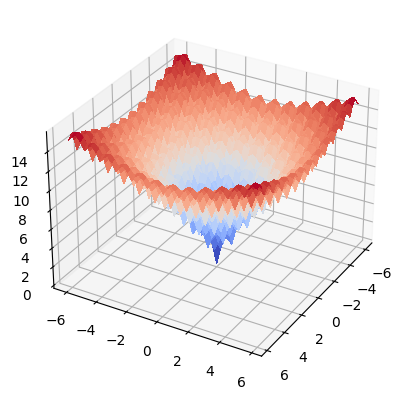

In [ ]:
from matplotlib import cm

def ackley(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
        np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) +\
        np.e + 20

def plot_function(x, y, func):
    x, y = np.meshgrid(x, y)
    z = func(x, y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.view_init(30, 30)
    plt.show()

X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
plot_function(X, Y, ackley)

In [ ]:
def demo_func(particle):
    x, y = particle[0], particle[1]
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
        np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) +\
        np.e + 20


x0 = np.random.rand(1, 2) * 3
bounds=[(-10,10),(-10,10)]

opt = minimize_pso(demo_func, x0[0], bounds, num_particles=10, maxiter=80, verbose=True)

iter:    0, best solution:  -1.000000
iter:    1, best solution:   5.383374
iter:    2, best solution:   5.383374
iter:    3, best solution:   3.927261
iter:    4, best solution:   3.910805
iter:    5, best solution:   3.146837
iter:    6, best solution:   0.185068
iter:    7, best solution:   0.185068
iter:    8, best solution:   0.185068
iter:    9, best solution:   0.185068
iter:   10, best solution:   0.185068
iter:   11, best solution:   0.185068
iter:   12, best solution:   0.185068
iter:   13, best solution:   0.185068
iter:   14, best solution:   0.171552
iter:   15, best solution:   0.171552
iter:   16, best solution:   0.171552
iter:   17, best solution:   0.024799
iter:   18, best solution:   0.024799
iter:   19, best solution:   0.021527
iter:   20, best solution:   0.021527
iter:   21, best solution:   0.021527
iter:   22, best solution:   0.011196
iter:   23, best solution:   0.011196
iter:   24, best solution:   0.009173
iter:   25, best solution:   0.009173
iter:   26, 

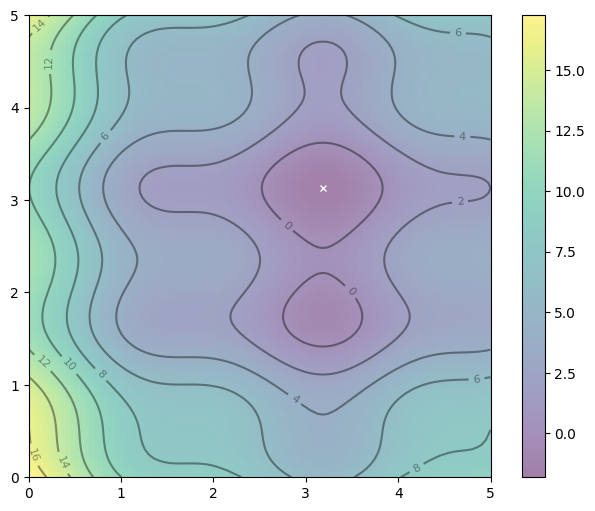

In [ ]:
# let's try to find the minimum
def f(x, y):
    # Define your function here
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()

In [ ]:
def f(particle):
    x, y = particle[0], particle[1]
    # Define your function here
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)


x0 = np.random.rand(1, 2) * 10
opt = minimize_pso(f, x0[0], bounds, num_particles=10, maxiter=30, verbose=True)

iter:    0, best solution:  -1.000000
iter:    1, best solution:   0.555231
iter:    2, best solution:   0.555231
iter:    3, best solution:   0.552711
iter:    4, best solution:  -1.757115
iter:    5, best solution:  -1.757115
iter:    6, best solution:  -1.757115
iter:    7, best solution:  -1.757115
iter:    8, best solution:  -1.757115
iter:    9, best solution:  -1.757115
iter:   10, best solution:  -1.772019
iter:   11, best solution:  -1.772019
iter:   12, best solution:  -1.778257
iter:   13, best solution:  -1.779849
iter:   14, best solution:  -1.801580
iter:   15, best solution:  -1.804606
iter:   16, best solution:  -1.807947
iter:   17, best solution:  -1.807947
iter:   18, best solution:  -1.807947
iter:   19, best solution:  -1.807947
iter:   20, best solution:  -1.807947
iter:   21, best solution:  -1.807978
iter:   22, best solution:  -1.807978
iter:   23, best solution:  -1.807978
iter:   24, best solution:  -1.808232
iter:   25, best solution:  -1.808331
iter:   26, 

## Applications of PSO & kmeans clustering

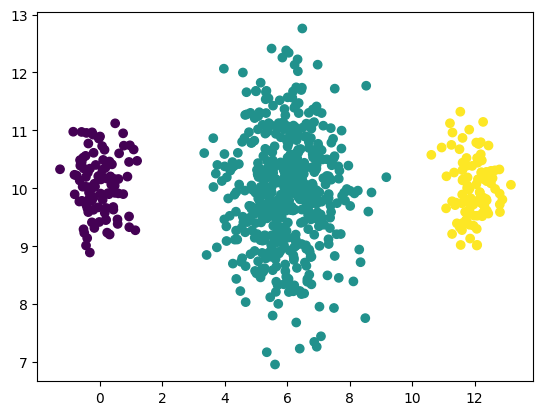

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=[100, 500, 100], centers=[(0, 10), (6, 10), (12, 10)], n_features=2,
                  cluster_std=[0.5, 1, 0.5], random_state=0)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)

centroids = array([[-4.78840902e-04,  1.00713893e+01],
       [ 5.97971492e+00,  9.93294293e+00],
       [ 1.19566500e+01,  1.00176949e+01]])


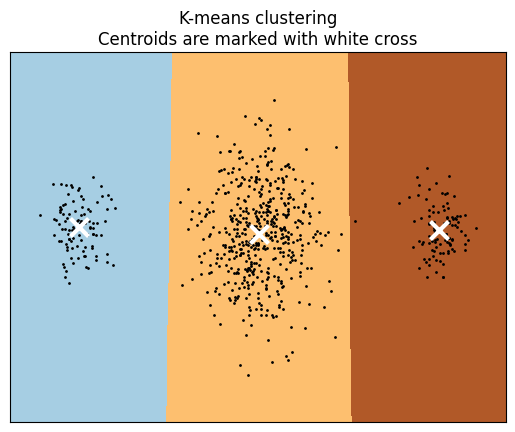

In [ ]:
# based on: hhttps://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

from sklearn.cluster import KMeans

kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4)
kmeans.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
print(f'{centroids = }')
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

best_x is  [ 5.98361614  9.93656396 12.04928847  9.9776087  -0.041391   10.07748209] best_y is 730.2616467428762


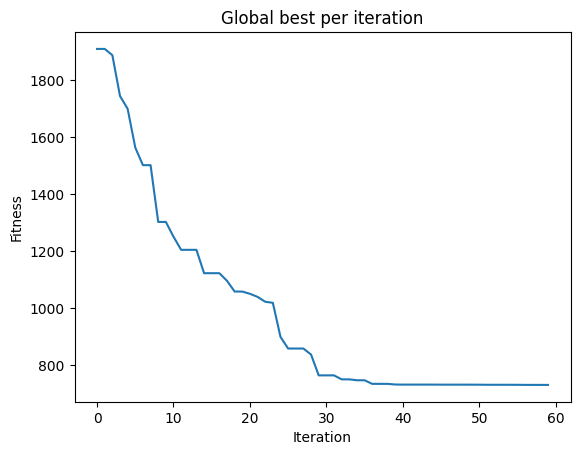

In [ ]:
def distance(p1, p2):
    return np.linalg.norm( np.array(p1) - np.array(p2) )

# particle
def demo_func(particle):
    c1x, c1y, c2x, c2y, c3x, c3y = particle
    c1 = (c1x, c1y)
    c2 = (c2x, c2y)
    c3 = (c3x, c3y)
    points = [[],[],[]]
    distances = [0, 0, 0]
    for x in X:
        d = [distance(c, x) for c in [c1,c2,c3]]
        c_idx = np.argmin(d)
        distances[c_idx] += d[c_idx]
    return sum(distances)

pso = PSO(
    func=demo_func, dim=6, pop=15, max_iter=60,
    lb=[-5]*6, ub=[15]*6, w=0.8,
    c1=0.5, c2=0.5
)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

# Plot the result
plt.title("Global best per iteration")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(pso.gbest_y_hist)
plt.show()

## Self-Study
- What is stability in PSO?
- What is fully Informed PSO?
- What is "new PSO" or "negative reinforcement PSO" NPSO?
- What is stagnation and how to counter it?
- How can PSO benefit from K-means